# DIVE INTO CODE COURSE
## Sprint machine learning scratch linear regression
### Doan Anh Tien - 1852789 - tien.doan.g0pr0@hcmut.edu.vn

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### [Problem 1] [Problem 2] [Problem 3] [Problem 5]

In [475]:
class ScratchLinearRegression():
    """
    Scratch implementation of linear regression
    
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    
    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data
    """
    
    def __init__(self, num_iter, lr, no_bias, verbose):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn linear regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data

        """
        # Initialization

        self.m = X.shape[0] # m = Number of example

        self.n = X.shape[1] # n = Number of features

        self.theta = np.random.randn(self.n+1) # Inlcuding the x0 feature where x0 = 1

        Y = y
        
        if self.no_bias == True:
            X = np.c_[np.zeros(len(X)), X]

            if X_val is None:
                X_val = 0
            else:
                X_val = np.c_[np.zeros(len(X_val)), X_val]
        else:
            X = np.c_[np.ones(len(X)), X]

            if X_val is None:
                X_val = 0
            else:
                X_val = np.c_[np.ones(len(X_val)), X_val]


        for i in range(self.iter):
            y_pred = self.predict(X)
            error = y_pred - y

            train_loss = self._loss_function(error)
            self.loss[i] = train_loss

            if not (X_val is None):
              y_val_pred = self.predict(X_val)
              error_val = y_val_pred - y_val
              
              val_loss = self._loss_function(error_val)
              self.val_loss[i] = val_loss


            theta = self._gradient_descent(X, error)

            if self.verbose:
              if ((i % 500) == 0):
                #Output learning process when verbose is set to True
                if not (X_val is None):
                  print("Iteration {} -- train loss: {} -- val loss: {}".format(i, train_loss, val_loss))

                else: print("Iteration {} -- train loss: {}".format(i, train_loss))
              
        
    def predict(self, X):
        """
        Estimate using linear regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by linear regression
        """
        y_pred = self._linear_hypothesis(X)
        return y_pred
    
    def _linear_hypothesis(self, X):
        """
        Compute a linear hypothetical function
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
          Training data
        Returns
        -------
          The following form of ndarray, shape (n_samples, 1)
          Estimated result by linear hypothetical function

        """

        hypothesis = X.dot(self.theta)

        return hypothesis

    def _gradient_descent(self, X, error):
        """
        Compute the new weight using learning rate
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
          Training data

        error : The follow forms of ndarray, shape(n_samples, )
          The vector returned from hypothetical function

        Returns
        -------
          The following form of ndarray, shape (n_samples, 1)
          Estimated result by linear hypothetical function

        """
        m = len(X)
        self.theta = self.theta - (self.lr/m * (X.T).dot(error))

        return self.theta
    
    def _loss_function(self, error):
        """
        Compute the loss during the weight and bias improving process
        Parameters
        ----------
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data

        y_pred : The following form of ndarray, shape (n_samples,)
            Predicted value of training data

        Returns
        ------------
        loss : float
            Loss value between predicted and true value of training data

        """
        loss = 1/(2*self.m) * error.T.dot(error)

        return loss

### [Problem 4] Mean squared error

In [77]:
def MSE(y_pred, y):
    """
    Calculation of mean square error
    Parameters
    ----------
    y_pred : ndarray, shape (n_samples,)
      Estimated value
    y : ndarray, shape (n_samples,)
      Correct answer value
    Returns
    ----------
    mse : numpy.float
      Mean squared error
    """

    m = y.shape[0]
    mse = 1/m * np.sum(np.square(y_pred - y))

    return mse

### [Problem 6] Learning and estimation

In [78]:
def scratch_train_val_split(X, y, train_size=0.8):
    """Divide the validation data.
    Parameters
    ----------
    X : ndarray
      Training data (n_samples, n_features)
    y : ndarray
      Correct answer value (n_samples,)
    train_size : float
      Specify what percentage to use as a train (0 < train_size < 1)
    Returns
    -------
    X_train : ndarray
      Training data (n_samples, n_features)
    X_val : ndarray
      Validation data (n_samples, n_features)
    y_train : ndarray
      Correct answer value of training data (n_samples,)
    y_val : ndarray
      Correct value of verification data (n_samples,)
    """
    ratio = np.random.rand(X.shape[0]) < train_size

    X_train = X[ratio]
    y_train = y[ratio]
    X_val = X[~ratio]
    y_val = y[~ratio]
    
    return X_train, X_val, y_train, y_val

In [460]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
print("Train dataset -- Rows: {}, Columns: {}".format(df_train.shape[0], df_train.shape[1]))
print("Test dataset -- Rows: {}, Columns: {}".format(df_test.shape[0], df_test.shape[1]))

Train dataset -- Rows: 1460, Columns: 81
Test dataset -- Rows: 1459, Columns: 80


In [461]:
target = df_train['SalePrice']

Since we only want to test out the performance of the scratch linear regression method, using features GrLivArea and YearBuilt is enough. We do not need to force ourselves into EDA (encoding categorical, imputing, ...) 

In [462]:
df_train = df_train[['GrLivArea', 'YearBuilt']].copy()

Training and Validation data splitting

In [463]:
X_house_train, X_house_val, y_house_train, y_house_val = scratch_train_val_split(df_train, target, train_size=0.8)

In [464]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_house_train = sc.fit_transform(X_house_train)
X_house_val = sc.fit_transform(X_house_val)

In [476]:
scratch_model = ScratchLinearRegression(5000, 0.001, False, True)
scratch_model.fit(X_house_train, y_house_train, X_house_val, y_house_val)

Iteration 0 -- train loss: 20074564008.127357 -- val loss: 3853538998.441289
Iteration 500 -- train loss: 7968172312.775801 -- val loss: 1374412487.949258
Iteration 1000 -- train loss: 3606359748.959311 -- val loss: 544965513.5025394
Iteration 1500 -- train loss: 2029429919.9609613 -- val loss: 282289871.5957679
Iteration 2000 -- train loss: 1457596490.8581634 -- val loss: 208882975.5438486
Iteration 2500 -- train loss: 1249683349.754684 -- val loss: 195086047.9837157
Iteration 3000 -- train loss: 1173909780.4587412 -- val loss: 197695772.69959536
Iteration 3500 -- train loss: 1146235942.189567 -- val loss: 203187716.96514273
Iteration 4000 -- train loss: 1136109594.2358065 -- val loss: 207901725.78392997
Iteration 4500 -- train loss: 1132397604.8873806 -- val loss: 211245002.19596624


Making some predictions and verification

Since our model has the shape of X as (m_sample, n_features + 1) due to its bias element, we need to a column filled with ones again to the train and validation dataset

In [478]:
X_house_train = np.c_[np.ones(len(X_house_train)), X_house_train]
X_house_val = np.c_[np.ones(len(X_house_val)), X_house_val]
X_house_train.shape

(1191, 3)

In [479]:
predictions = scratch_model.predict(X_house_val)
print("Mean squared error of validation dataset: {}".format(MSE(predictions, y_house_val)))

Mean squared error of validation dataset: 22896390781.19364


### [Problem 7] Learning curve plot

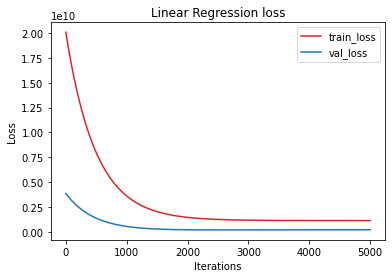

In [487]:
train_loss = scratch_model.loss
val_loss = scratch_model.val_loss
iteration = range(1, scratch_model.iter+1)

plt.plot(iteration, train_loss, label = "train_loss", color='tab:red')
plt.plot(iteration, val_loss, label = "val_loss", color='tab:blue')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Linear Regression loss')
plt.legend()
plt.show()

### [Problem 8] (Advance task) Removal of bias term

In [488]:
X_house_train, X_house_val, y_house_train, y_house_val = scratch_train_val_split(df_train, target, train_size=0.8)

In [489]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_house_train = sc.fit_transform(X_house_train)
X_house_val = sc.fit_transform(X_house_val)

In [490]:
scratch_model_nobias = ScratchLinearRegression(5000, 0.001, True, True)
scratch_model_nobias.fit(X_house_train, y_house_train, X_house_val, y_house_val)

Iteration 0 -- train loss: 19528133430.357132 -- val loss: 5253300341.920729
Iteration 500 -- train loss: 18130393970.633156 -- val loss: 4849500868.39503
Iteration 1000 -- train loss: 17700009463.19113 -- val loss: 4721711625.020328
Iteration 1500 -- train loss: 17566781765.295918 -- val loss: 4680214481.943237
Iteration 2000 -- train loss: 17525230483.10322 -- val loss: 4666184326.9947405
Iteration 2500 -- train loss: 17512136019.496906 -- val loss: 4661153257.896978
Iteration 3000 -- train loss: 17507950748.384293 -- val loss: 4659204189.031387
Iteration 3500 -- train loss: 17506587870.5291 -- val loss: 4658379132.857673
Iteration 4000 -- train loss: 17506133418.612053 -- val loss: 4657998037.931576
Iteration 4500 -- train loss: 17505977460.411953 -- val loss: 4657808418.484646


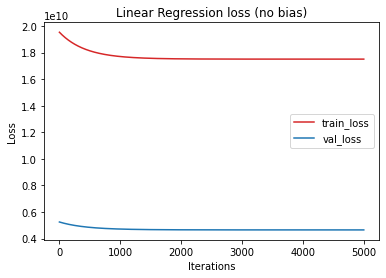

In [491]:
train_loss_nobias = scratch_model_nobias.loss
val_loss_nobias = scratch_model_nobias.val_loss
iteration_nobias = range(1, scratch_model_nobias.iter+1)

plt.plot(iteration_nobias, train_loss_nobias, label = "train_loss", color='tab:red')
plt.plot(iteration_nobias, val_loss_nobias, label = "val_loss", color='tab:blue')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Linear Regression loss (no bias)')
plt.legend()
plt.show()

The bias seems to cause impact on the perfomance as well as the cost of learning process, in which the loss value of both train and validation of model with no bias is smaller than the model with bias terms.

In addition to this, the curve of training model with no bias reach it stable state very early (which is the bad output since we need to minimize it as much as possible). On the contrary, the model with bias terms has its training data reaching it stable state at around 2000th iteration, with a dramatically decrease in the cost value (which is a very good sign).

Speaking of the validation dataset, both model witness the same pattern since the number of sample is quite small (the division is 80 - 20 for train - validation dataset). Nevertheless, the model with no bias still reach it stable state earlier than that with bias terms.

### [Problem 9] (Advance task) Multidimensional feature quantity

In [492]:
X_house_train_sqr = X_house_train**2
X_house_val_sqr = X_house_val**2

In [493]:
scratch_model_new = ScratchLinearRegression(5000, 0.001, False, True)
scratch_model_new.fit(X_house_train_sqr, y_house_train, X_house_val_sqr, y_house_val)

Iteration 0 -- train loss: 19527554870.96344 -- val loss: 5253140904.227885
Iteration 500 -- train loss: 7078134577.652087 -- val loss: 1850647757.8706973
Iteration 1000 -- train loss: 5211344109.210789 -- val loss: 1380880668.5233154
Iteration 1500 -- train loss: 4252471985.2851944 -- val loss: 1149392539.4343112
Iteration 2000 -- train loss: 3682069916.374553 -- val loss: 1015460223.315901
Iteration 2500 -- train loss: 3335737201.9470453 -- val loss: 936786680.085458
Iteration 3000 -- train loss: 3124904157.7848754 -- val loss: 890961087.1002237
Iteration 3500 -- train loss: 2996515613.548146 -- val loss: 864679045.2826163
Iteration 4000 -- train loss: 2918329117.6470447 -- val loss: 849945128.6482842
Iteration 4500 -- train loss: 2870714591.2453494 -- val loss: 841965941.7609333


In [496]:
X_house_train_cub = X_house_train**3
X_house_val_cub = X_house_val**3

In [498]:
scratch_model_new_2 = ScratchLinearRegression(5000, 0.001, False, True)
scratch_model_new_2.fit(X_house_train_cub, y_house_train, X_house_val_cub, y_house_val)

Iteration 0 -- train loss: 19528265516.428688 -- val loss: 5253345614.71785
Iteration 500 -- train loss: 8919907209.391577 -- val loss: 2365230893.0184093
Iteration 1000 -- train loss: 5084646509.403142 -- val loss: 1365520448.2458243
Iteration 1500 -- train loss: 3612801534.6798654 -- val loss: 991196048.4508023
Iteration 2000 -- train loss: 3047956447.20289 -- val loss: 853340311.6328851
Iteration 2500 -- train loss: 2831187712.500662 -- val loss: 804027402.1214267
Iteration 3000 -- train loss: 2747999090.724227 -- val loss: 787327664.2431684
Iteration 3500 -- train loss: 2716074067.945599 -- val loss: 782297171.239486
Iteration 4000 -- train loss: 2703822307.3363786 -- val loss: 781220483.6867363
Iteration 4500 -- train loss: 2699120489.6096835 -- val loss: 781336236.4440039


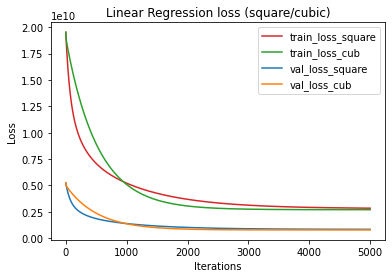

In [500]:
train_loss_sqr = scratch_model_new.loss
val_loss_sqr = scratch_model_new.val_loss

train_loss_cub = scratch_model_new_2.loss
val_loss_cub = scratch_model_new_2.val_loss

iteration = range(1, scratch_model_new.iter+1)

plt.plot(iteration, train_loss_sqr, label = "train_loss_square", color='tab:red')
plt.plot(iteration, train_loss_cub, label = "train_loss_cub", color='tab:green')
plt.plot(iteration, val_loss_sqr, label = "val_loss_square", color='tab:blue')
plt.plot(iteration, val_loss_cub, label = "val_loss_cub", color='tab:orange')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Linear Regression loss (square/cubic)')
plt.legend()
plt.show()

### [Problem 10] (Advance task) Derivation of update formula

As we know: $h_\theta(x) = \theta_0x_0 + \theta_1x_1 + ... + \theta_nx_n $. So in general form, if we take derivative of $\theta$, it will become $x_j$ as j is the jth value of array x

Back to the cost function, if we take derivative of $J(\theta)$:

$dJ(\theta) = \frac{2}{2m} \times \sum_{i=1}^m (h\theta(x^i) - y^i)x^i$ (derivative of $u^n$ is $n\times du \times u^{n-1}$)

Therefore, $\theta_j = \theta_j - \alpha \sum_{i=1}^m (h\theta(x^i) - y^i)$ and by defaul $alpha$ is equal 1.

Because in Machine Learning, we need to find the optimal solution by minizing the cost function, which mean the smaller the learning rate, the more accurate we will move from the slope to its minimal point. And, the larger the learning rate, the more chance the learning pattern witnesses divergent behavior (in this case, the learning rate will be the variabe that we need to tune for the best solution)
